In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy import stats
%matplotlib inline

In [64]:
df_socmed = pd.read_csv('hookit_data_sept17.csv', index_col=0, header=0, parse_dates=True)
df_playerdata = pd.read_csv('player_data_Sept2017.csv', index_col=0, parse_dates=True)
df_clubrev = pd.read_csv('Club Revenue Deloitte.csv', parse_dates=True)


In [128]:
df_playerdata['Name'].replace(
    to_replace=['Neymar'],
    value='Neymar da Silva',
    inplace=True
)


In [65]:
df_playerdata_merge = pd.merge(left=df_playerdata,right=df_socmed, left_on='Name', right_on='name')

In [66]:
df_playerdata_merge.head(n=40)

,Name,Date.of.birth,Place.of.birth,Age,Height,Shoe.size,Nationality,Position,Foot,Current.club,...,Continent,Continent.specific,name,facebook,twitter,instagram,total_followers,new_followers_month,posts,interactions_likes_comments_retweets
0,Benjamin Mendy,"Jul 17, 1994","Longjumeau, France",23,1.85,NaN,"France, Senegal",Defence - Left-Back,left,Manchester City,...,Europe,Western Europe,Benjamin Mendy,NaN,478109.0,723194.0,1201303,275900.0,168.0,4400000.0
1,Leroy Sane,"Jan 11, 1996","Essen, Germany",21,1.84,NaN,"Germany, France",Striker - Left Wing,left,Manchester City,...,Europe,Central Europe,Leroy Sane,311793.0,184615.0,1253264.0,1749672,143500.0,52.0,1900000.0
2,Sergio Aguero,"Jun 2, 1988","Buenos Aires, Argentina",29,1.73,NaN,"Argentina, Spain",Striker - Centre-Forward,right,Manchester City,...,South America,South,Sergio Aguero,11083383.0,12115007.0,7432927.0,30631317,356700.0,47.0,2800000.0
3,Gabriel Jesus,"Apr 3, 1997","Sao Paulo, Brazil",20,1.75,NaN,Brazil,Striker - Centre-Forward,right,Manchester City,...,South America,Brazil,Gabriel Jesus,NaN,NaN,NaN,0,NaN,NaN,NaN
4,Thibaut Courtois,"May 11, 1992","Bree, Belgium",25,1.99,NaN,Belgium,Goalkeeper,left,Chelsea FC,...,Europe,Central Europe,Thibaut Courtois,5428743.0,1891584.0,4027589.0,11347916,130600.0,64.0,2900000.0
5,David Luiz,"Apr 22, 1987","Diadema, Brazil",30,1.89,NaN,"Brazil, Portugal",Defence - Centre-Back,both,Chelsea FC,...,South America,Brazil,David Luiz,25924523.0,8604135.0,17190690.0,51719348,38500.0,40.0,7100000.0
6,Eden Hazard,"Jan 7, 1991","La Louviere, Belgium",26,1.73,NaN,Belgium,Striker - Left Wing,both,Chelsea FC,...,Europe,Central Europe,Eden Hazard,8938343.0,5125924.0,10528208.0,24592475,507800.0,25.0,10600000.0
7,Alvaro Morata,"Oct 23, 1992","Madrid, Spain",24,1.89,NaN,Spain,Striker - Centre-Forward,right,Chelsea FC,...,Europe,Southern Europe,Alvaro Morata,7550830.0,3968453.0,7404470.0,18923753,398800.0,37.0,8500000.0
8,Michy Batshuayi,"Oct 2, 1993","Brussel, Belgium",23,1.85,NaN,"Belgium, Congo DR",Striker - Centre-Forward,both,Chelsea FC,...,Europe,Central Europe,Michy Batshuayi,773965.0,905794.0,1262900.0,2942659,159900.0,78.0,3300000.0
9,David de Gea,"Nov 7, 1990","Madrid, Spain",26,1.89,NaN,Spain,Goalkeeper,right,Manchester United,...,Europe,Southern Europe,David de Gea,6639054.0,8951138.0,7554932.0,23145124,638600.0,41.0,4100000.0


In [71]:
df_playerdata_merge[['Name', 'Current.market.value', 'Highest.market.value', 'Current.club', 'facebook', 'twitter', 'instagram', 'total_followers']]

,Name,Current.market.value,Highest.market.value,Current.club,facebook,twitter,instagram,total_followers
0,Benjamin Mendy,30000000.0,30000000.0,Manchester City,NaN,478109.0,723194.0,1201303
1,Leroy Sane,35000000.0,35000000.0,Manchester City,311793.0,184615.0,1253264.0,1749672
2,Sergio Aguero,65000000.0,65000000.0,Manchester City,11083383.0,12115007.0,7432927.0,30631317
3,Gabriel Jesus,30000000.0,30000000.0,Manchester City,NaN,NaN,NaN,0
4,Thibaut Courtois,40000000.0,40000000.0,Chelsea FC,5428743.0,1891584.0,4027589.0,11347916
5,David Luiz,30000000.0,30000000.0,Chelsea FC,25924523.0,8604135.0,17190690.0,51719348
6,Eden Hazard,75000000.0,75000000.0,Chelsea FC,8938343.0,5125924.0,10528208.0,24592475
7,Alvaro Morata,50000000.0,50000000.0,Chelsea FC,7550830.0,3968453.0,7404470.0,18923753
8,Michy Batshuayi,25000000.0,25000000.0,Chelsea FC,773965.0,905794.0,1262900.0,2942659
9,David de Gea,40000000.0,40000000.0,Manchester United,6639054.0,8951138.0,7554932.0,23145124


In [52]:
print(df_playerdata.loc[df_playerdata['Current.club'] == 'Leicester City'])


                  Name Date.of.birth              Place.of.birth Age  Height  \
217  Kasper Schmeichel   Nov 5, 1986         Kopenhagen, Denmark  30    1.85   
218    Eldin Jakupovic   Oct 2, 1984  Kozarac, Jugoslawien (SFR)  32    1.91   
219          Ben Hamer  Nov 20, 1987            Taunton, England  29    1.93   
220      Harry Maguire   Mar 5, 1993          Sheffield, England  24    1.88   
221        Robert Huth  Aug 18, 1984                 Berlin, DDR  33    1.91   
222         Wes Morgan  Jan 21, 1984         Nottingham, England  33    1.85   
223   Yohan Benalouane  Mar 28, 1987    Bagnols-sur-Ceze, France  30    1.85   
224    Christian Fuchs   Apr 7, 1986        Neunkirchen, Austria  31    1.86   
225       Ben Chilwell  Dec 21, 1996            Bedford, England  20    1.78   
226      Danny Simpson   Jan 4, 1987             Eccles, England  30    1.77   
227      Onyinye Ndidi  Dec 16, 1996              Lagos, Nigeria  20    1.87   
228     Vicente Iborra  Jan 16, 1988    

In [72]:
#add the club revenue data
df_playerdata_addrev = pd.merge(left=df_playerdata_merge,right=df_clubrev, left_on='Current.club', right_on='Club')

In [73]:
df_playerdata_addrev.head(n=100)

,Name,Date.of.birth,Place.of.birth,Age,Height,Shoe.size,Nationality,Position,Foot,Current.club,...,name,facebook,twitter,instagram,total_followers,new_followers_month,posts,interactions_likes_comments_retweets,Club,Club Revenue
0,Benjamin Mendy,"Jul 17, 1994","Longjumeau, France",23,1.85,NaN,"France, Senegal",Defence - Left-Back,left,Manchester City,...,Benjamin Mendy,NaN,478109.0,723194.0,1201303,275900.0,168.0,4400000.0,Manchester City,524900000.0
1,Leroy Sane,"Jan 11, 1996","Essen, Germany",21,1.84,NaN,"Germany, France",Striker - Left Wing,left,Manchester City,...,Leroy Sane,311793.0,184615.0,1253264.0,1749672,143500.0,52.0,1900000.0,Manchester City,524900000.0
2,Sergio Aguero,"Jun 2, 1988","Buenos Aires, Argentina",29,1.73,NaN,"Argentina, Spain",Striker - Centre-Forward,right,Manchester City,...,Sergio Aguero,11083383.0,12115007.0,7432927.0,30631317,356700.0,47.0,2800000.0,Manchester City,524900000.0
3,Gabriel Jesus,"Apr 3, 1997","Sao Paulo, Brazil",20,1.75,NaN,Brazil,Striker - Centre-Forward,right,Manchester City,...,Gabriel Jesus,NaN,NaN,NaN,0,NaN,NaN,NaN,Manchester City,524900000.0
4,Thibaut Courtois,"May 11, 1992","Bree, Belgium",25,1.99,NaN,Belgium,Goalkeeper,left,Chelsea FC,...,Thibaut Courtois,5428743.0,1891584.0,4027589.0,11347916,130600.0,64.0,2900000.0,Chelsea FC,447400000.0
5,David Luiz,"Apr 22, 1987","Diadema, Brazil",30,1.89,NaN,"Brazil, Portugal",Defence - Centre-Back,both,Chelsea FC,...,David Luiz,25924523.0,8604135.0,17190690.0,51719348,38500.0,40.0,7100000.0,Chelsea FC,447400000.0
6,Eden Hazard,"Jan 7, 1991","La Louviere, Belgium",26,1.73,NaN,Belgium,Striker - Left Wing,both,Chelsea FC,...,Eden Hazard,8938343.0,5125924.0,10528208.0,24592475,507800.0,25.0,10600000.0,Chelsea FC,447400000.0
7,Alvaro Morata,"Oct 23, 1992","Madrid, Spain",24,1.89,NaN,Spain,Striker - Centre-Forward,right,Chelsea FC,...,Alvaro Morata,7550830.0,3968453.0,7404470.0,18923753,398800.0,37.0,8500000.0,Chelsea FC,447400000.0
8,Michy Batshuayi,"Oct 2, 1993","Brussel, Belgium",23,1.85,NaN,"Belgium, Congo DR",Striker - Centre-Forward,both,Chelsea FC,...,Michy Batshuayi,773965.0,905794.0,1262900.0,2942659,159900.0,78.0,3300000.0,Chelsea FC,447400000.0
9,David de Gea,"Nov 7, 1990","Madrid, Spain",26,1.89,NaN,Spain,Goalkeeper,right,Manchester United,...,David de Gea,6639054.0,8951138.0,7554932.0,23145124,638600.0,41.0,4100000.0,Manchester United,689000000.0


In [74]:

df_playerdata_addrev.head()

,Name,Date.of.birth,Place.of.birth,Age,Height,Shoe.size,Nationality,Position,Foot,Current.club,...,name,facebook,twitter,instagram,total_followers,new_followers_month,posts,interactions_likes_comments_retweets,Club,Club Revenue
0,Benjamin Mendy,"Jul 17, 1994","Longjumeau, France",23,1.85,NaN,"France, Senegal",Defence - Left-Back,left,Manchester City,...,Benjamin Mendy,NaN,478109.0,723194.0,1201303,275900.0,168.0,4400000.0,Manchester City,524900000.0
1,Leroy Sane,"Jan 11, 1996","Essen, Germany",21,1.84,NaN,"Germany, France",Striker - Left Wing,left,Manchester City,...,Leroy Sane,311793.0,184615.0,1253264.0,1749672,143500.0,52.0,1900000.0,Manchester City,524900000.0
2,Sergio Aguero,"Jun 2, 1988","Buenos Aires, Argentina",29,1.73,NaN,"Argentina, Spain",Striker - Centre-Forward,right,Manchester City,...,Sergio Aguero,11083383.0,12115007.0,7432927.0,30631317,356700.0,47.0,2800000.0,Manchester City,524900000.0
3,Gabriel Jesus,"Apr 3, 1997","Sao Paulo, Brazil",20,1.75,NaN,Brazil,Striker - Centre-Forward,right,Manchester City,...,Gabriel Jesus,NaN,NaN,NaN,0,NaN,NaN,NaN,Manchester City,524900000.0
4,Thibaut Courtois,"May 11, 1992","Bree, Belgium",25,1.99,NaN,Belgium,Goalkeeper,left,Chelsea FC,...,Thibaut Courtois,5428743.0,1891584.0,4027589.0,11347916,130600.0,64.0,2900000.0,Chelsea FC,447400000.0


In [9]:
df_rev_socmed = df_playerdata_addrev[['Name', 'Current.club', 'Club Revenue', 'facebook', 'twitter', 'instagram', 'total_followers']]

In [10]:
df_rev_socmed = df_rev_socmed.sort_values(by=['Club Revenue'], ascending=[False])
print(df_rev_socmed)

                         Name                   Current.club  Club Revenue  \
16            Marcus Rashford              Manchester United   689000000.0   
17         Zlatan Ibrahimovic              Manchester United   689000000.0   
9                David de Gea              Manchester United   689000000.0   
10           Antonio Valencia              Manchester United   689000000.0   
11                 Paul Pogba              Manchester United   689000000.0   
12         Henrikh Mkhitaryan              Manchester United   689000000.0   
13                  Juan Mata              Manchester United   689000000.0   
14              Jesse Lingard              Manchester United   689000000.0   
15            Anthony Martial              Manchester United   689000000.0   
36              Samuel Umtiti                   FC Barcelona   620200000.0   
38              Sergi Roberto                   FC Barcelona   620200000.0   
39             Andres Iniesta                   FC Barcelona   6

In [77]:
df_rev_socmed.drop(df_rev_socmed.tail(n=6).index,inplace=True)
df_rev_socmed = df_rev_socmed[['Current_club']]
#df_rev_socmed.rename(columns={'Current.club': 'Current_club'}, inplace=True)
df_rev_socmed.head(n=20)

,Current_club
16,Manchester United
17,Manchester United
9,Manchester United
10,Manchester United
11,Manchester United
12,Manchester United
13,Manchester United
14,Manchester United
15,Manchester United
36,FC Barcelona


Text(0.5,0,'How many players from each club')

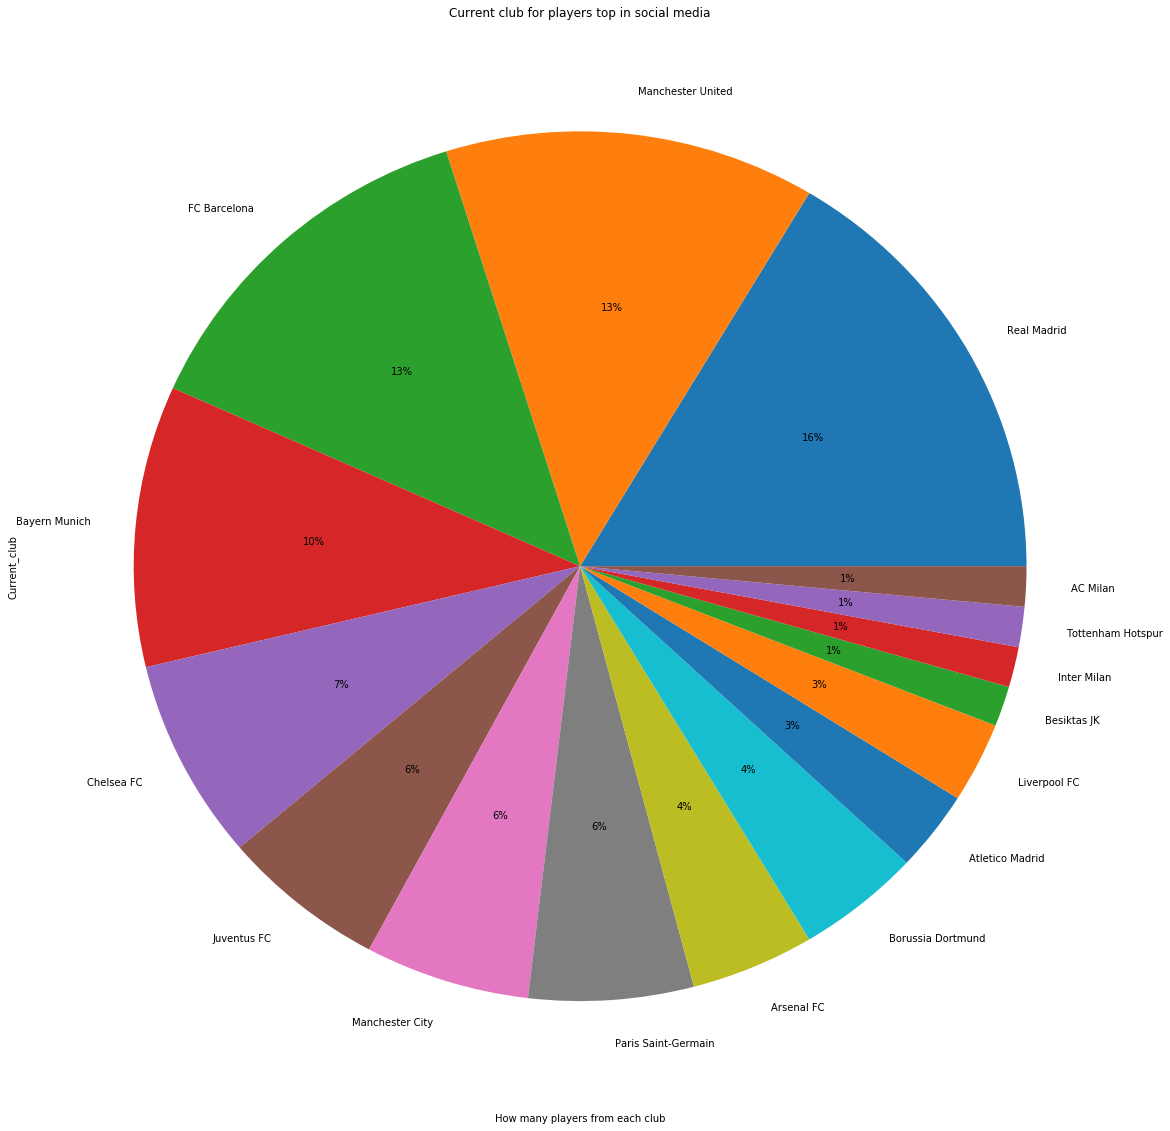

In [20]:
df_rev_socmed.Current_club.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(20,20))
plt.title('Current club for players top in social media')
plt.xlabel('How many players from each club')
#clean this up with legend to the side and space between slices

In [17]:
df_socmedtop15 = df_playerdata_addrev.sort_values(by=['total_followers'], ascending=[False])
df_socmedtop15 = df_socmedtop15.head(n=15)
df_socmedtop15 = df_socmedtop15[['Name', 'Current.club', 'total_followers']]
print(df_socmedtop15)
#color code these and print next to pie chart

                  Name         Current.club  total_followers
31   Cristiano Ronaldo          Real Madrid        295303125
47     Neymar da Silva  Paris Saint-Germain        176217584
42        Lionel Messi         FC Barcelona        170259880
57     James Rodriguez        Bayern Munich         79961391
32         Gareth Bale          Real Madrid         75149723
39      Andres Iniesta         FC Barcelona         65494126
19          Mesut Ozil           Arsenal FC         64192643
17  Zlatan Ibrahimovic    Manchester United         59417527
43         Luis Suarez         FC Barcelona         55211293
5           David Luiz           Chelsea FC         51719348
34       Karim Benzema          Real Madrid         50454148
77       Iker Casillas             FC Porto         44231697
27          Toni Kroos          Real Madrid         31676940
2        Sergio Aguero      Manchester City         30631317
11          Paul Pogba    Manchester United         29049135


In [18]:
df_clubrevtop5 = df_playerdata_addrev.sort_values(by=['Club Revenue'], ascending=[False])
df_clubrevtop5.rename(columns={'Current.club': 'Current_club'}, inplace=True)
df_rev_socmed.Current_club.value_counts()
#df_clubrevtop5 = df_clubrevtop5.head(n=5)
#df_clubrevtop5 = df_clubrevtop5[['Current.club', 'Club Revenue']]
#print(df_clubrevtop5)

Real Madrid            11
Manchester United       9
FC Barcelona            9
Bayern Munich           7
Chelsea FC              5
Juventus FC             4
Manchester City         4
Paris Saint-Germain     4
Arsenal FC              3
Borussia Dortmund       3
Atletico Madrid         2
Liverpool FC            2
Besiktas JK             1
Inter Milan             1
Tottenham Hotspur       1
AC Milan                1
Name: Current_club, dtype: int64

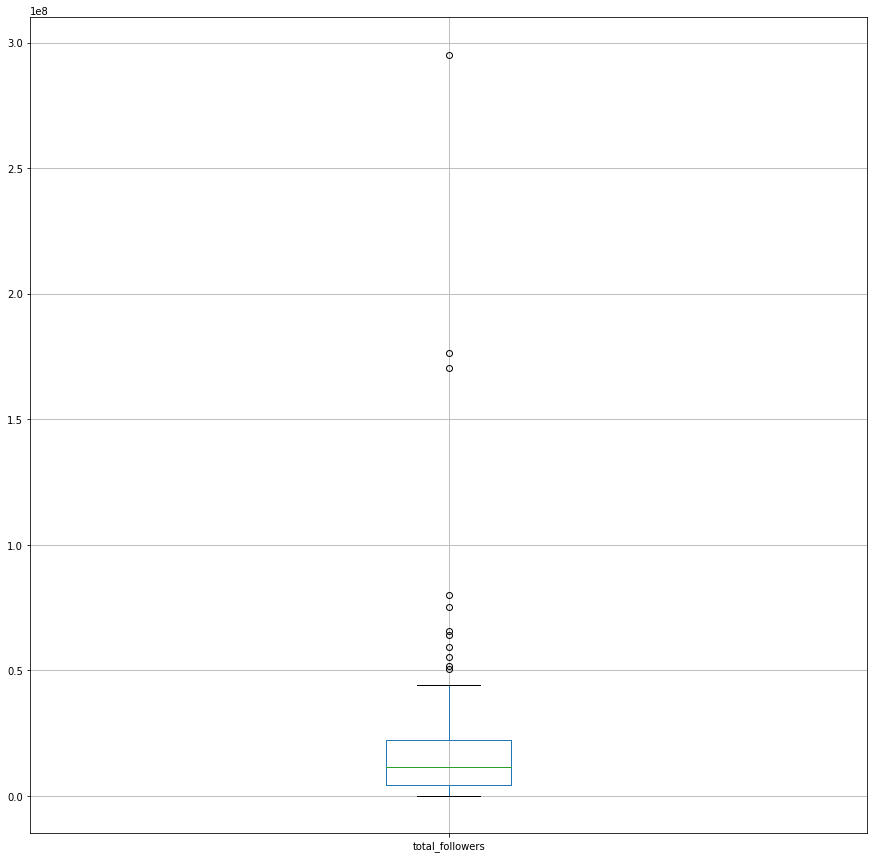

In [24]:
df_playerdata_addrev.boxplot(column='total_followers', figsize =(15, 15))


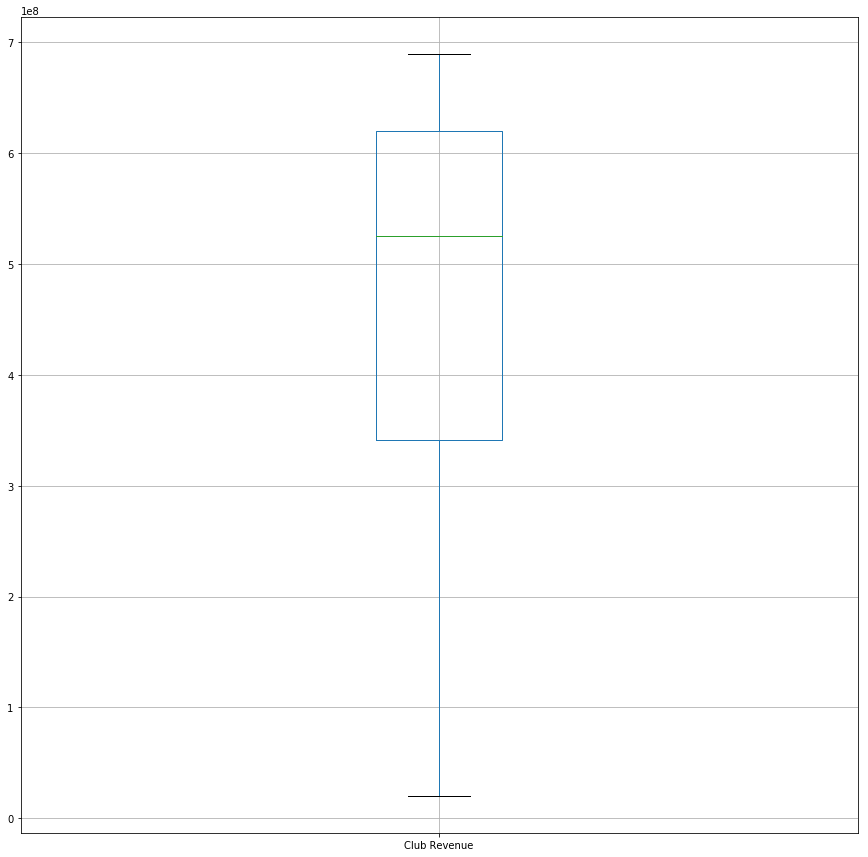

In [85]:
df_playerdata_addrev.boxplot(column='Club Revenue', figsize = (15,15))


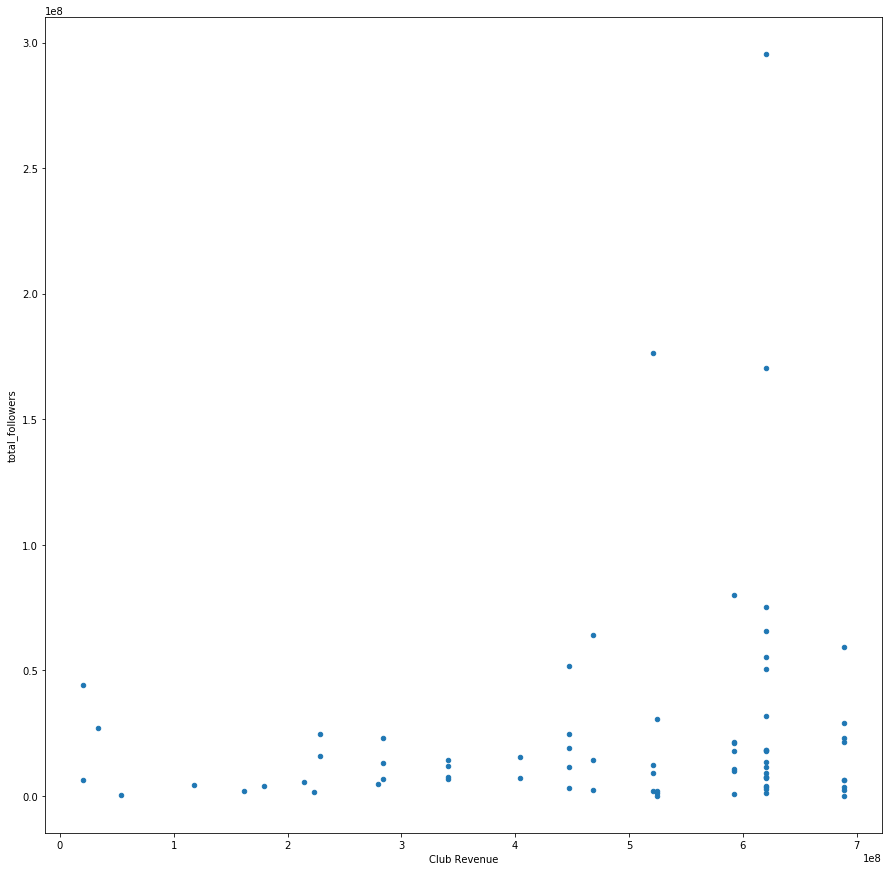

In [88]:
df_playerdata_addrev.plot(kind='scatter', x='Club Revenue', y='total_followers', figsize=(15, 15))

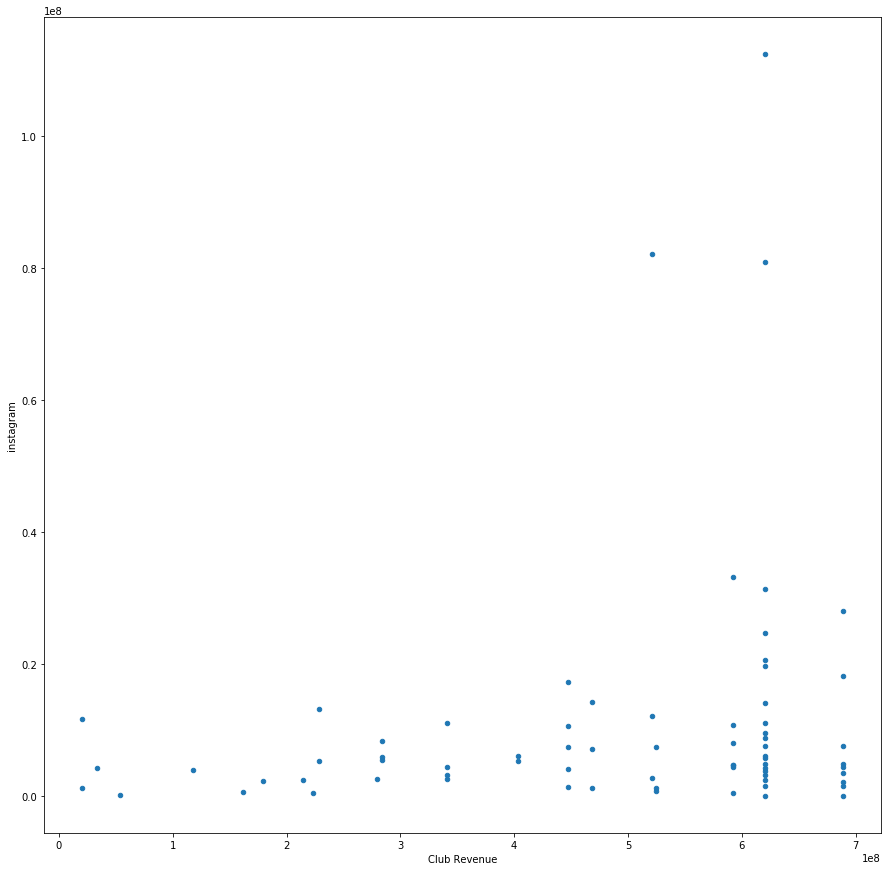

In [89]:
df_playerdata_addrev.plot(kind='scatter', x='Club Revenue', y='instagram', figsize=(15, 15))

In [102]:
#two_sample_diff_var = stats.ttest_ind('total_followers', 'Club Revenue', equal_var=False, nan_policy='omit')
#ttest_ind(df[df['Treatment'] == 'a']['Performance'], df[df['Treatment'] == 'b']['Performance'])
#ttest_ind(df_playerdata_addrev[df_playerdata_addrev['total_followers'] == 'a']['Club Revenue'], df_playerdata_addrev[df_playerdata_addrev['total_followers'] == 'b']['Club Revenue'])
crev = df_playerdata_addrev.iloc[:, -1]

In [124]:
crev = crev.dropna()

In [125]:
totfo = df_playerdata_addrev.iloc[:, -6]
totfo.head()

0     1201303
1     1749672
2    30631317
3           0
4    11347916
Name: total_followers, dtype: int64

In [126]:
totfo = totfo.dropna()

In [127]:
sp.stats.ttest_ind(totfo, crev, equal_var=False)

Ttest_indResult(statistic=-20.485108615494145, pvalue=2.1913094883502182e-33)

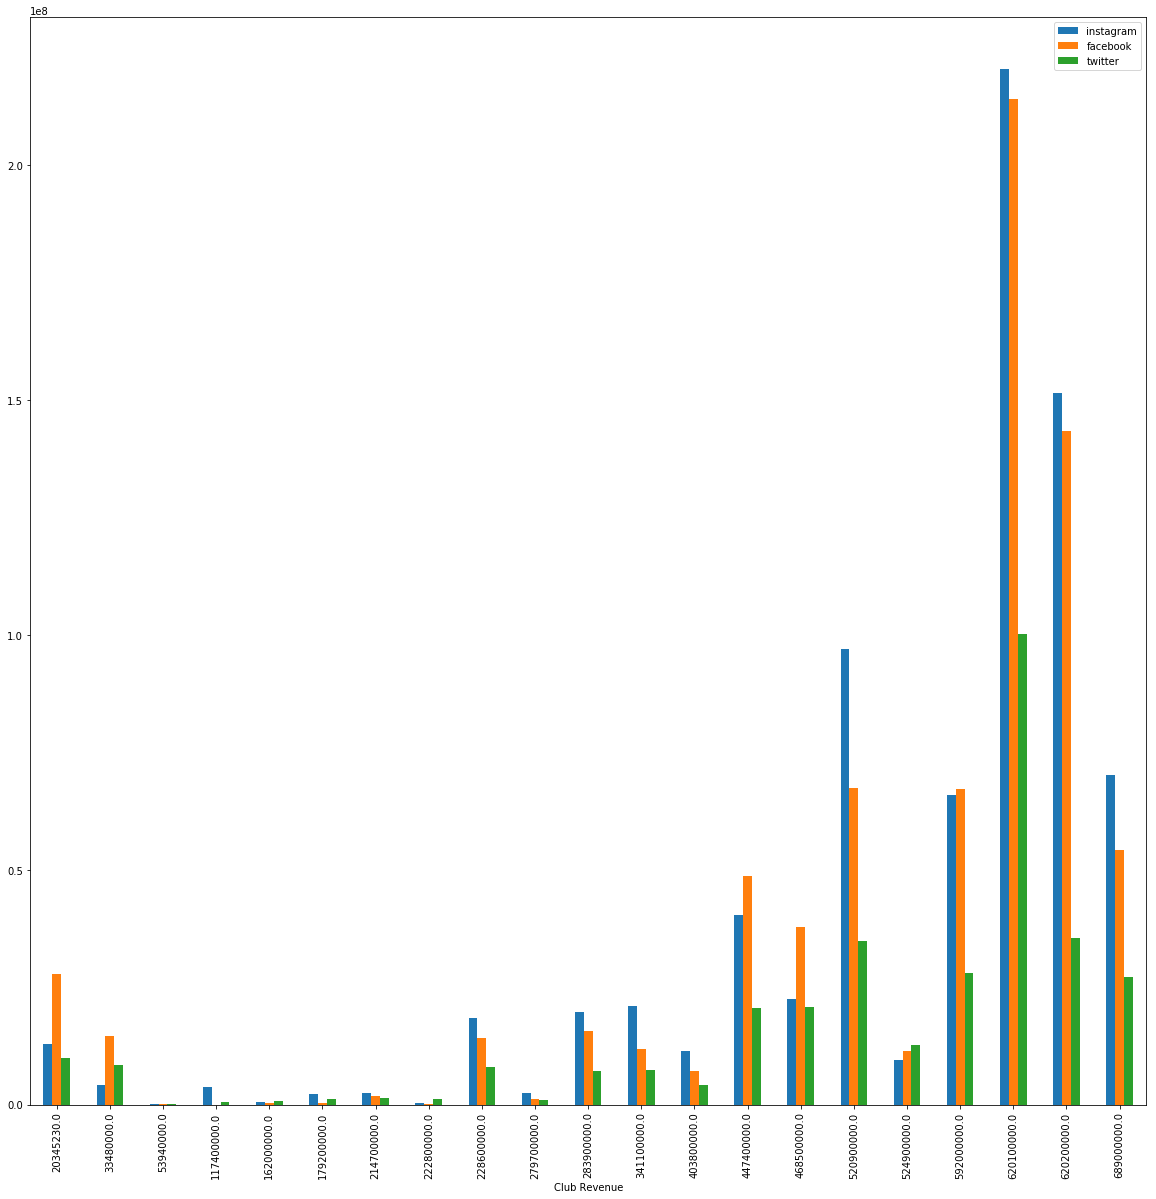

In [139]:
group_data = df_playerdata_addrev.groupby(['Club Revenue'])['instagram','facebook', 'twitter'].sum()
group_data.plot.bar(figsize=(20, 20))

Club Revenue
0.0            AxesSubplot(0.125,0.125;0.775x0.755)
20345230.0     AxesSubplot(0.125,0.125;0.775x0.755)
33480000.0     AxesSubplot(0.125,0.125;0.775x0.755)
53940000.0     AxesSubplot(0.125,0.125;0.775x0.755)
117400000.0    AxesSubplot(0.125,0.125;0.775x0.755)
162000000.0    AxesSubplot(0.125,0.125;0.775x0.755)
179200000.0    AxesSubplot(0.125,0.125;0.775x0.755)
214700000.0    AxesSubplot(0.125,0.125;0.775x0.755)
222800000.0    AxesSubplot(0.125,0.125;0.775x0.755)
228600000.0    AxesSubplot(0.125,0.125;0.775x0.755)
279700000.0    AxesSubplot(0.125,0.125;0.775x0.755)
283900000.0    AxesSubplot(0.125,0.125;0.775x0.755)
341100000.0    AxesSubplot(0.125,0.125;0.775x0.755)
403800000.0    AxesSubplot(0.125,0.125;0.775x0.755)
447400000.0    AxesSubplot(0.125,0.125;0.775x0.755)
468500000.0    AxesSubplot(0.125,0.125;0.775x0.755)
520900000.0    AxesSubplot(0.125,0.125;0.775x0.755)
524900000.0    AxesSubplot(0.125,0.125;0.775x0.755)
592000000.0    AxesSubplot(0.125,0.125;0.775x0.755)

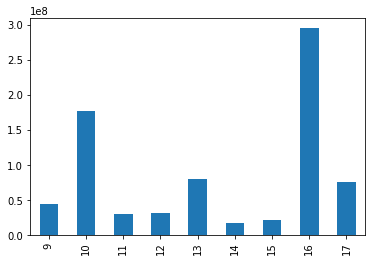

In [133]:
df_revfol = df_playerdata_addrev.replace(np.nan,0)
df_revfol = df_revfol.groupby(['Club Revenue'])['total_followers']
df_revfol.plot.bar()